

# Arreglos y operaciones vectoriales con [NumPy](http://www.numpy.org/)


NumPy es un paquete de computación científica con Python que provee:

- Un objecto contenedor muy versatil: arreglo N-dimensional `ndarray`
- Funciones capaces de hacer *broadcasting*
- Módulos para algebra lineal, Transformada de Fourier, generación de número aleatorios, entre otros
- Herramientas para integrar código C/C++


In [1]:
import numpy as np

In [2]:
# Contenidos del namespace np:
np?

### Tipo ndarray (alias array)

Arreglo n-dimensional de tipo fijo. Se puede almacenar y operar de manera eficiente

Podemos crearlo a partir de una lista o una tupla

In [5]:
A

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [3]:
L = [x for x in range(100000)]
print(type(L))
A = np.array(L)
print(type(A))

<class 'list'>
<class 'numpy.ndarray'>


Podemos especificar el tipo del arreglo
- int: int8, int16, int32, int64
- uint: uint8, uint16, uint32, uint64
- bool: Bool
- float: float16, float32, float64, float128
- complex: complex64, complex128, complex256

Contrastemos con Python que sólo ofrece int y float

In [6]:
L = [x for x in range(10)]
np.array(L, dtype=np.float32)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [7]:
x = np.array([1. + 2j])
print(x.dtype)
print(x.real)
print(x.imag)

complex128
[1.]
[2.]


Podemos construir arreglos con más de una dimensión

Los atributos `ndim` y `shape` nos indican las dimensiones y el tamaño del arreglo, respectivamente

In [8]:
L = [[i-j for i in range(5)] for j in range(5)]
print(L)
A = np.array(L)
print(A)
print(A.ndim)
print(A.shape)

[[0, 1, 2, 3, 4], [-1, 0, 1, 2, 3], [-2, -1, 0, 1, 2], [-3, -2, -1, 0, 1], [-4, -3, -2, -1, 0]]
[[ 0  1  2  3  4]
 [-1  0  1  2  3]
 [-2 -1  0  1  2]
 [-3 -2 -1  0  1]
 [-4 -3 -2 -1  0]]
2
(5, 5)


Por defecto un ndarray multidimensional se ordena en memoria siguiente un formato row-major (C). Esto se puede cambiar a formato column-major usando:

In [7]:
np.array(L, order='F')

array([[ 0,  1,  2,  3,  4],
       [-1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1],
       [-4, -3, -2, -1,  0]])

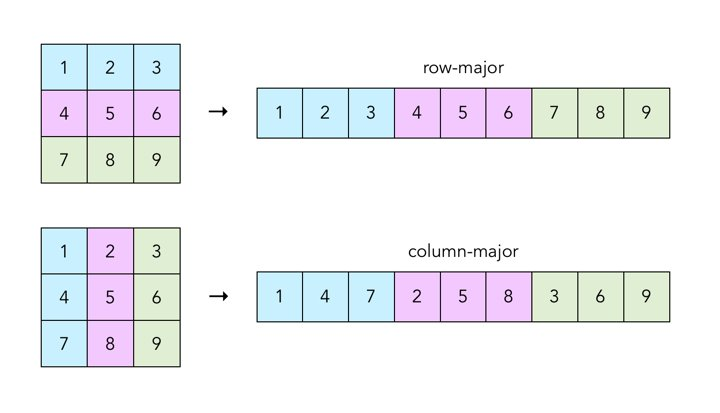

### Indexación

Podemos indexar y asignar valores a nuestros arreglos de diversas formas

In [8]:
print(L[3][1]) 
print(A[3, 1]) # Cuarta fila y segunda columna
print(A[:, 1])  # Segunda columna
print(A[2, :]) # Tercera fila 
print(A[::2, 1]) # Elementos pares de la segunda columna

-2
-2
[ 1  0 -1 -2 -3]
[-2 -1  0  1  2]
[ 1 -1 -3]


Podemos usar un arreglo de enteros para indexar otro arreglo

In [9]:
ix = np.array([2, 0, 1])
iy = np.array([0, 2, 1])
A[ix, iy] = 10
print(A)

[[ 0  1 10  3  4]
 [-1 10  1  2  3]
 [10 -1  0  1  2]
 [-3 -2 -1  0  1]
 [-4 -3 -2 -1  0]]


También podemos indexar usando un arreglo de booleanos

In [10]:
A = np.array([0, 2, 1, 3, 4])
B = [True, False, False, True, True]
print(A[B])

[0 3 4]


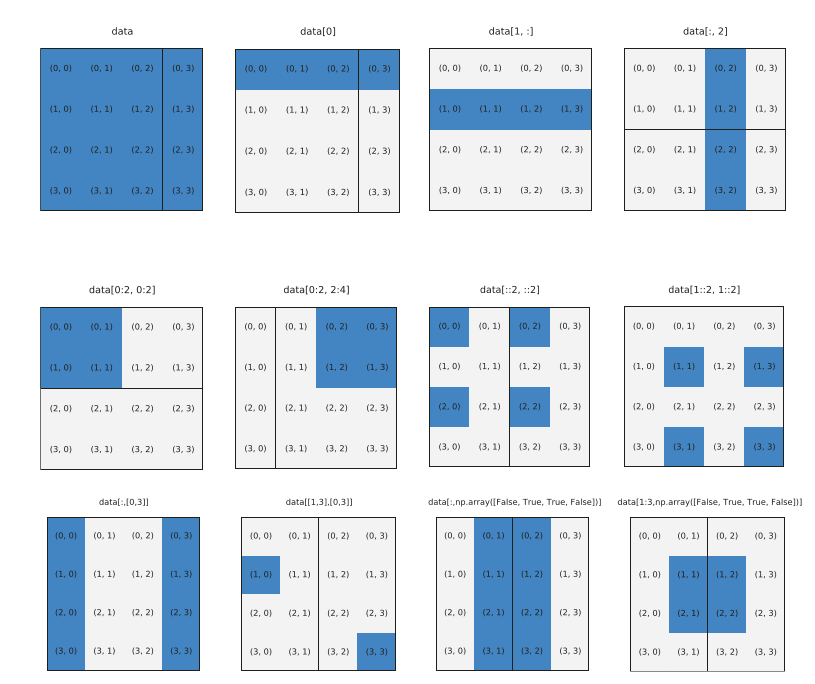

### Creación de arreglos

Se pueden crear arreglos directamente desde Numpy:

In [11]:
print(np.zeros(shape=(3, 3), dtype=np.int))  # Lleno de ceros
print(np.ones(shape=(3, 3), dtype=np.float32))  # Lleno de unos
print(np.full(shape=(3, 3), fill_value=2.1))  # Lleno de 2.1
print(np.eye(3))  # Matriz identidad
print(np.random.randn(3, 3))  # Matriz aleatoria con distribución N(0, 1)
# np.empty((3, 3))

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2.1 2.1 2.1]
 [2.1 2.1 2.1]
 [2.1 2.1 2.1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0.69706005  0.15367076 -0.93800849]
 [-0.52101505  0.97951715 -0.56960167]
 [-2.12126685  1.29642354 -0.89307181]]


Existen versiones de estas funciones que copian el tamaño de otro ndarray

In [12]:
print(np.zeros_like(A))

[0 0 0 0 0]


Funciones para crear rangos:

In [13]:
print(np.arange(start=0, stop=10, step=0.5))  
print(np.linspace(start=0, stop=10, num=21)) 
print(np.logspace(start=-1, stop=1, num=21))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[ 0.1         0.12589254  0.15848932  0.19952623  0.25118864  0.31622777
  0.39810717  0.50118723  0.63095734  0.79432823  1.          1.25892541
  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171  5.01187234
  6.30957344  7.94328235 10.        ]


Se puede usar `meshgrid` para crear arreglos de coordenadas

In [14]:
x = np.arange(3)
X, Y = np.meshgrid(x, x)
print(X)
print(Y)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


Ojo con los tamaños de los arreglos. 

Un arreglo unidimensional puese ser vector fila, vector columna o ninguno!

In [15]:
A = np.array([0, 1, 2, 3, 4])
print(A.shape)
A = np.array([[0], [1], [2], [3], [4]])
print(A.shape)
A = np.array([[0, 1, 2, 3, 4]])
print(A.shape)

(5,)
(5, 1)
(1, 5)


Se puede agregar una dimensión a un arreglo usando `newaxis`

In [16]:
A = np.array([0, 1, 2, 3, 4])
print(A.shape)
print(A[:, np.newaxis].shape)
print(A[np.newaxis, :].shape)

(5,)
(5, 1)
(1, 5)


### Manipulación de matrices y vectores

Operaciones para modificar la forma de un arreglo: `reshape`, `tile`, `repeat`

In [17]:
A = np.arange(6)
print(A)
# Crea nuevas dimensiones pero se debe preservar el tamaño
print(np.reshape(A, (3, 2)))  # in-place: A.reshape(3, 2)
print(np.reshape(A, (2, 3)))
# Repite el arreglo en una dirección dada
print(np.tile(A, (6, 1)))
print(np.tile(A, (1, 6)))
# Repite cada elemento en una dirección dada
print(np.repeat(A, 2))
print(np.repeat(A.reshape(3, 2), 2, axis=0))
# Aplana una matriz
print(np.ravel(np.zeros(shape=(5, 5))))

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[[0 1 2]
 [3 4 5]]
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
[[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5]]
[0 0 1 1 2 2 3 3 4 4 5 5]
[[0 1]
 [0 1]
 [2 3]
 [2 3]
 [4 5]
 [4 5]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


Se puede crear una matriz diagonal a partir de un vector con `diag`

También sirve para extraer la diagonal de una matriz 

In [18]:
A = np.arange(5)
print(np.diag(A))
B = np.random.randn(3, 3)
print(B)
print(np.diag(B))

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]
[[-0.06534917 -1.11454385  1.03373817]
 [ 1.37676115 -0.03358066  0.55020012]
 [-0.70135027  0.75944034  1.62972984]]
[-0.06534917 -0.03358066  1.62972984]


Trasposición de una matriz con `transpose`

In [19]:
A = np.arange(9).reshape(3, 3)
print(A)
print(np.transpose(A)) # Equivalente a A.transpose() o A.T
A = np.arange(27).reshape(3, 3, 3)
print(A)
print(np.transpose(A, axes=(0, 2, 1)))  # Equivalente a: np.swapaxes(A, 2, 1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
[[[ 0  3  6]
  [ 1  4  7]
  [ 2  5  8]]

 [[ 9 12 15]
  [10 13 16]
  [11 14 17]]

 [[18 21 24]
  [19 22 25]
  [20 23 26]]]


Operaciones para juntar dos o más arreglos: `concatenate`, `vstack`, `hstack`

In [20]:
A = np.arange(6).reshape(1, 6)
B = np.ones(shape=(1,6))
print(np.concatenate((A, B), axis=0))
print(np.concatenate((A, B), axis=1))
print(np.vstack((A, B)))
print(np.hstack((A, B)))

[[0. 1. 2. 3. 4. 5.]
 [1. 1. 1. 1. 1. 1.]]
[[0. 1. 2. 3. 4. 5. 1. 1. 1. 1. 1. 1.]]
[[0. 1. 2. 3. 4. 5.]
 [1. 1. 1. 1. 1. 1.]]
[[0. 1. 2. 3. 4. 5. 1. 1. 1. 1. 1. 1.]]


Operaciones para agregar o quitar elementos: `append`, `insert`, `delete`

In [21]:
A = np.array([1. , 2., 3.])
print(A)
print(np.append(A, 4))
print(np.insert(A, 2, values=0.))
print(np.delete(A, 2))

[1. 2. 3.]
[1. 2. 3. 4.]
[1. 2. 0. 3.]
[1. 2.]


### Operaciones aritméticas básicas entre arreglos

- Suma:  +, +=
- Resta: -, -=
- Multiplicación:  *,*= 
- División: /, /=
- División entera: //, //=
- Exponenciación: ** , **=

In [22]:
N = 5
A = np.eye(N)
B = np.ones(shape=(N, N))
print(A + B)
print(A*B)  

[[2. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1.]
 [1. 1. 1. 2. 1.]
 [1. 1. 1. 1. 2.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Operaciones matriciales: `dot`, `inner`, `cross`

In [23]:
print(np.dot(A, B))  #  Equivalente a A.dot(B) y A@B

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Cuando los términos no son del mismo tamaño se hace un `broadcast`

In [24]:
A - 1

array([[ 0., -1., -1., -1., -1.],
       [-1.,  0., -1., -1., -1.],
       [-1., -1.,  0., -1., -1.],
       [-1., -1., -1.,  0., -1.],
       [-1., -1., -1., -1.,  0.]])

In [25]:
C = np.arange(N)
print(C)
print(B + C)

[0 1 2 3 4]
[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


In [26]:
C.reshape(1, N) + C.reshape(N, 1)

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

Reglas de broadcasting

1. Si dos arreglos son de dimensiones distintas la dimensión del más pequeño se agranda con "1"s por la izquierda
1. Si dos arreglos tienen tamaños ditintos, el que tiene tamaño "1" se estira en dicha dimensión
1. Si en cualquier dimensión los tamaños son distintos y ninguno es igual a "1" ocurre un error


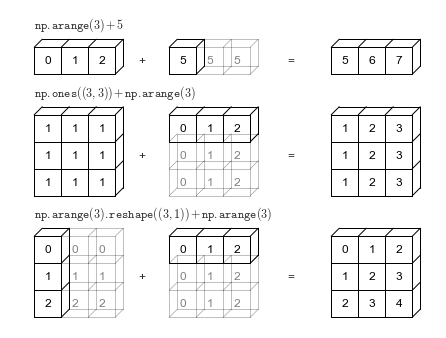

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Broadcasting

In [28]:
A = np.arange(6).reshape(2, 3)
print(A.shape)
print(A)
B = np.arange(3)
print(B.shape)
print(B)
print(B.reshape(1, -1))
A + B

(2, 3)
[[0 1 2]
 [3 4 5]]
(3,)
[0 1 2]
[[0 1 2]]


array([[0, 2, 4],
       [3, 5, 7]])

### Operaciones de reducción

Tal vez la mayor ventaja de NumPy son sus operaciones de **reducción** y **vectorizadas**. Son funciones altamente eficientes que trabajan sobre los `ndarray`

Hagamos una pequeña prueba de desempeño sumando (reducción) un vector


In [29]:
A = np.arange(100000)

def suma_loop(arreglo):
    suma = 0.
    for elemento in arreglo:
        suma += elemento
    return suma

L = list(A)
%timeit -n10 suma_loop(A)
%timeit -n10 suma_loop(L)
%timeit -n10 sum(A)
%timeit -n10 sum(L)
%timeit -n10 np.sum(L)
%timeit -n10 np.sum(A)

print(np.sum(A))
print(sum(L))

25.6 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.3 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.6 ms ± 511 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.95 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.6 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.9 µs ± 6.63 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4999950000
4999950000


Reducciones eficientes con NumPy: `sum`, `prod`, `amax`, `amin`, `argmax`, `argmin`, `mean`, `std`, `var`, `percentile`, `median`, `cumsum`, `cumprod`

In [30]:
A = np.tile(np.arange(3), (3, 1))
print(A)
print(np.sum(A, axis=0))
print(np.sum(A, axis=1))
print(np.sum(A))
A = np.random.randn(3, 3)
print(A)
print(np.amax(A, axis=0))
print(np.argmax(A, axis=0))

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[0 3 6]
[3 3 3]
9
[[-0.92595607  0.56408305 -0.51638651]
 [-1.4177067  -0.65532152  0.20540977]
 [ 0.46224771  1.50345139  0.56376023]]
[0.46224771 1.50345139 0.56376023]
[2 2 2]


Muchas de estas funciones están implementadas como métodos de la clase arreglo

In [31]:
print(A.sum())
print(A.max(axis=0))
print(A.min())

-0.2164186412414978
[0.46224771 1.50345139 0.56376023]
-1.417706702173125


También cuenta con versiones seguras contra NaNs

In [32]:
A = np.array([1., 10., 2., np.nan])
print(np.sum(A))
print(np.nansum(A))

nan
13.0


Si queremos encontrar los nan en un arreglo podemos usar `isnan` que nos entrega una mascara booleana

In [33]:
np.isnan(A)

array([False, False, False,  True])

### Operaciones vectorizadas

Son funciones que operan son *element-wise*

Valor absoluto de un arreglo

In [34]:
A = np.random.randn(3, 3)
print(A)
np.absolute(A) # Equivalente a np.abs(A)

[[ 0.75183946  1.33022415  0.25099107]
 [ 1.58750397  0.26045417 -1.38408949]
 [-1.70255993 -0.60010222  0.13297876]]


array([[0.75183946, 1.33022415, 0.25099107],
       [1.58750397, 0.26045417, 1.38408949],
       [1.70255993, 0.60010222, 0.13297876]])

Exponentes y raices

In [35]:
x = np.arange(10)
print(np.power(x, 2))
print(np.sqrt(x))
print(x**2)

[ 0  1  4  9 16 25 36 49 64 81]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[ 0  1  4  9 16 25 36 49 64 81]


Función exponencial, logaritmo y funciones trigonométricas 

In [36]:
x = np.array([0.1, 1., 10.0])
print(np.log(x)) #log2, log10
print(np.exp(x)) 
print(np.sin(x)) #arcsin, sinh
print(np.cos(x)) #arccos, cosh
print(np.tan(x)) #arctan, tanh

[-2.30258509  0.          2.30258509]
[1.10517092e+00 2.71828183e+00 2.20264658e+04]
[ 0.09983342  0.84147098 -0.54402111]
[ 0.99500417  0.54030231 -0.83907153]
[0.10033467 1.55740772 0.64836083]


Otras funciones: `sign`, `reciprocal`, `round` `floor`, `ciel`, `real`, `imag`,  `conj`, 

### Operaciones booleanas 

NumPy soporta operaciones booleanas sobre ndarray

La función `where` sirve para recuperar el índice de los elementos que cumplen una cierta condición

Otras funciones de interés: `choose`, `select`, `nonzero`

In [37]:
A = np.arange(6).reshape(2, 3)
print(A)
print(A == 4)
print(np.equal(A, 4))

[[0 1 2]
 [3 4 5]]
[[False False False]
 [False  True False]]
[[False False False]
 [False  True False]]


In [38]:
mask = ~(A % 2 == 0) & (A > 2)
print(mask)
print(A[mask])

[[False False False]
 [ True False  True]]
[3 5]


In [39]:
(ixs, iys) = np.where(~(A % 2 == 0) & (A > 2))

for i, j in zip(ixs, iys):
    print("Fila {0} Columna {1} Valor {2}".format(i, j, A[i, j]))

Fila 1 Columna 0 Valor 3
Fila 1 Columna 2 Valor 5


Funciones `any` y `all`

In [40]:
x = np.random.randn(3, 3)
print(x)
b = (x > 0) & (x**2 > 0.5)
print(b)
print(np.any(b))
print(np.all(b))

[[-0.59348434  0.90122365 -0.91637074]
 [-0.16066659 -0.07972929 -1.71705037]
 [ 1.11828878  0.20004753 -2.96996415]]
[[False  True False]
 [False False False]
 [ True False False]]
True
False


### Ordenando arreglos

NumPy provee la función `np.sort` para ordernar ndarray (implementa quicksort)

In [41]:
np.sort?

In [42]:
A = np.random.randn(5)
print(A)
print(np.sort(A))
print(np.sort(A, kind='heapsort'))
idx = np.argsort(A)
print(idx)
print(A[idx])

[ 0.30842799 -0.39870782  0.02458117  0.35907801  1.07389995]
[-0.39870782  0.02458117  0.30842799  0.35907801  1.07389995]
[-0.39870782  0.02458117  0.30842799  0.35907801  1.07389995]
[1 2 0 3 4]
[-0.39870782  0.02458117  0.30842799  0.35907801  1.07389995]


In [43]:
A = np.random.randn(3, 3)
print(A)
print(np.sort(A))
print(np.sort(A, axis=0))
print(np.sort(A, axis=None))

[[-0.48729093  1.33784428 -0.15612811]
 [-0.29816912  1.14768728 -0.4268131 ]
 [-0.11385049 -0.67971754  0.40930109]]
[[-0.48729093 -0.15612811  1.33784428]
 [-0.4268131  -0.29816912  1.14768728]
 [-0.67971754 -0.11385049  0.40930109]]
[[-0.48729093 -0.67971754 -0.4268131 ]
 [-0.29816912  1.14768728 -0.15612811]
 [-0.11385049  1.33784428  0.40930109]]
[-0.67971754 -0.48729093 -0.4268131  -0.29816912 -0.15612811 -0.11385049
  0.40930109  1.14768728  1.33784428]


### Copias en memoria
Algunas operaciones sobre arreglos no hacen copias (usan referencias)

In [44]:
A = np.arange(100).reshape(10, 10)
B = A
B is A

True

Se modifico A se ve reflejado en B

In [45]:
A[:5, :5] = 100
print(B)

[[100 100 100 100 100   5   6   7   8   9]
 [100 100 100 100 100  15  16  17  18  19]
 [100 100 100 100 100  25  26  27  28  29]
 [100 100 100 100 100  35  36  37  38  39]
 [100 100 100 100 100  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99]]


Modificaciones en subarreglos (vistas) también son referenciadas

In [46]:
A = np.arange(100).reshape(10, 10)
B = A[:5, :5]
print(B is A)
B[:, :] = 100
print(A)

False
[[100 100 100 100 100   5   6   7   8   9]
 [100 100 100 100 100  15  16  17  18  19]
 [100 100 100 100 100  25  26  27  28  29]
 [100 100 100 100 100  35  36  37  38  39]
 [100 100 100 100 100  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99]]


Se puede forzar la creación de una copia con el método `copy()`

In [47]:
B = A.copy()
A[0, 0] = 0
print(B[0])

[100 100 100 100 100   5   6   7   8   9]


# Modulos de NumPy: `np.random`

Es un módulo para generar permutaciones y arreglos de números aleatorios siguiendo distintas distribuciones



In [48]:
%matplotlib notebook
import matplotlib.pylab as plt

- `np.random.rand(d1, d2, ... ,dn)` Genera flotantes con distribución uniforme en [0, 1)
- `np.random.seed` Especifica la semilla para inicializar el generador de números pseudo-aleatorios

[0.75421202 0.27242491 0.49569445 0.42510405 0.40961678 0.85670884
 0.55523006 0.50609474 0.43267911 0.04978985]


<IPython.core.display.Javascript object>


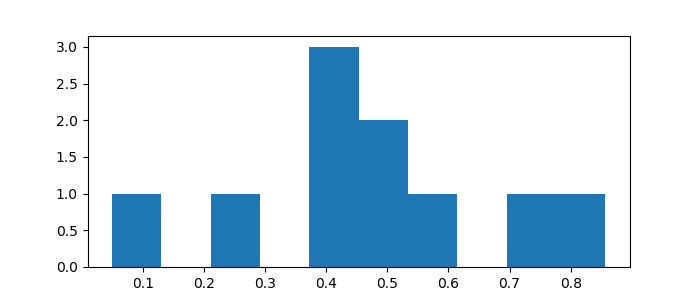

In [49]:
#np.random.seed(0)

data = np.random.rand(10)
if len(data) <= 10:
    print(data)

fig, ax = plt.subplots(figsize=(7, 3))
ax.hist(data);

Mayor control sobre el generador de números aleatorios con `get_state` y `set_state`

<IPython.core.display.Javascript object>


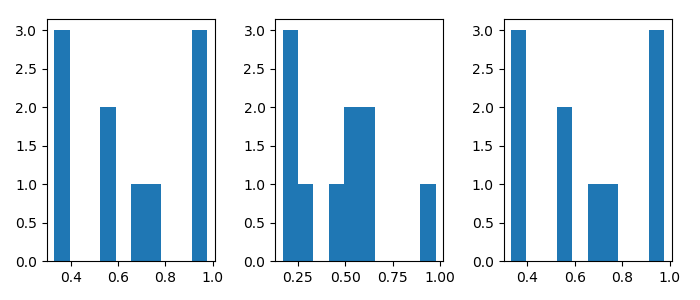

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(7, 3), tight_layout=True)

rstate = np.random.get_state()
data = np.random.rand(10)
ax[0].hist(data);
data = np.random.rand(10)
ax[1].hist(data);
np.random.set_state(rstate)
data = np.random.rand(10)
ax[2].hist(data);

- `np.random.randn` Números con distribución normal estándar $\mathcal{N}(0, I)$

<IPython.core.display.Javascript object>


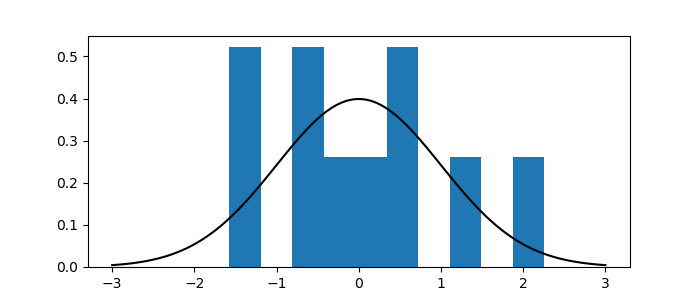

In [51]:
x = np.linspace(-3, 3, num=100)
fig, ax = plt.subplots(figsize=(7, 3))

data = np.random.randn(10)
ax.hist(data, bins=None, density=True);
ax.plot(x, np.exp(-0.5*x**2)/np.sqrt(2.*np.pi), color='black')

- `np.random.randint` Números con distribución categórica (discreta)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))

data = np.random.randint(low=0, high=10, size=10)
print(data)
ax.hist(data, bins=None, density=True);


- `np.random.choice` Extrae una muestra aleatoria de una arreglo
- `np.random.permutation` Crea una permutación de indices 
- `np.random.shuffle` Desordena una arreglo (*inplace*)

In [ ]:
x = np.array([0, 1, 10, 100, 1000, 10000])
print(x)
np.random.choice(x, size=None, replace=True)

In [ ]:
# Entregar un entero D es equivalente a entregar range(D)
np.random.choice(10, size=10, replace=True)

In [ ]:
idx = np.random.permutation(len(x))
print(idx)
print(x[idx])

In [ ]:
np.random.shuffle(x)
print(x)

`np.random` ofrece una gran cantidad de distribuciones para crear números aleatorios

Estudiaremos algunas de ellas en la siguiente unidad del curso

# Tópicos extra

### Computación simbólica 

Es un paradigma donde los cálculos se hacen de forma *análitica* en lugar de *númerica*

Se definen variables o simbolos que son operados algebraicamente

Este paradigma se usa tipicamente para obtener expresiones simplificadas de derivadas o integrales, series, límites, factorizaciones, expansiones, etc

- Paradigma númerico: Nos da el resultado de una expresión
- Paradigma simbólico: Nos da la expresión

En Python se puede hacer computación simbólica con [SimPy](https://www.sympy.org)
